In [15]:
import torch
import data
import torch.nn as nn
import math
from main_2 import Config, batchify, evaluate
import matplotlib.pyplot as plt

- The best `nhid`- `nlayers` configuration you get in part 3 is tuple (400,2). It has the lowest valid ppl and test ppl, thus was saved in model pt as our logic in main. 
- We just need to load the model in model.pt and test with varying bptt. 
- Note: model.pt is output after part 3 is executed. However, model.pt is too big to upload in github. 

In [9]:
args = Config()
device = torch.device("cuda" if args.cuda and torch.cuda.is_available() else "cpu")
model_path = './model.pt'

# Load the saved model
with open(model_path, 'rb') as f:
    model = torch.load(f).to(device)


corpus = data.Corpus(args.data)
eval_batch_size = 10
test_data = batchify(corpus.test, eval_batch_size, device)
criterion = nn.NLLLoss()

In [21]:
bptt_values = [5,25,35,50,75]
test_ppls = []

for bptt in bptt_values:
    args.bptt = bptt
    test_loss = evaluate(test_data, model, criterion, args, corpus)
    test_ppl = math.exp(test_loss)
    print('-' * 50)
    print(f"Test loss for bptt = {bptt}: {test_loss}")
    print(f"Test ppl for bptt = {bptt}: {test_ppl}")
    print('-' * 50)
    test_ppls.append(test_ppl)

--------------------------------------------------
Test loss for bptt = 5: 4.904312099902651
Test ppl for bptt = 5: 134.87010093322354
--------------------------------------------------
--------------------------------------------------
Test loss for bptt = 25: 4.904312102330044
Test ppl for bptt = 25: 134.87010126060633
--------------------------------------------------
--------------------------------------------------
Test loss for bptt = 35: 4.9043121126221925
Test ppl for bptt = 35: 134.87010264870946
--------------------------------------------------
--------------------------------------------------
Test loss for bptt = 50: 4.904312119321798
Test ppl for bptt = 50: 134.8701035522859
--------------------------------------------------
--------------------------------------------------
Test loss for bptt = 75: 4.904312092717566
Test ppl for bptt = 75: 134.8700999641705
--------------------------------------------------


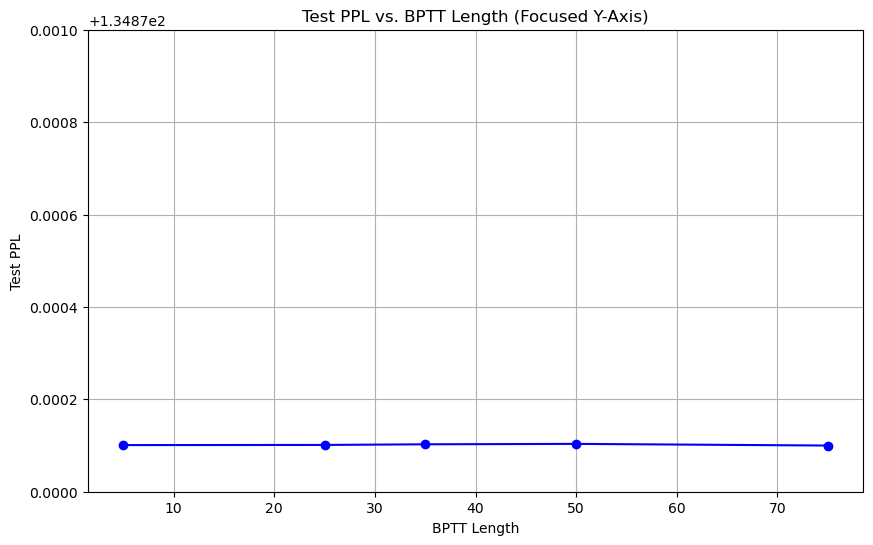

In [22]:
# Adjusting Y-axis limits to make the plot's y-axis less varied and focus on the changes in perplexity

plt.figure(figsize=(10, 6))
plt.plot(bptt_values, test_ppls, marker='o', linestyle='-', color='b')

# Setting Y-axis limits to focus on the range of perplexity values observed
plt.ylim([134.87, 134.87 + 0.001])  # Adjust the limits as needed to focus on the variation

plt.title('Test PPL vs. BPTT Length (Focused Y-Axis)')
plt.xlabel('BPTT Length')
plt.ylabel('Test PPL')
plt.grid(True)
plt.show()


Given the range of testing BPTT varying from the training BPTT - default = 35, we can see the test PPL across different BPTT lengths is very stable (very small variation). This suggests that for the sequences and tasks at hand, the model has captured the essence of the dependencies in the data, and the choice of BPTT length during testing within the examined range is not critical to its performance.

1. **Generalization Ability**: If the model has been trained effectively, it should generalize well to sequences of different lengths. This means it can handle shorter or longer sequences during testing than it saw during training without a significant loss in performance.

2. **Effective Context Window**: The model may have learned to use a context window that is effectively captured within the range of BPTT lengths used during testing. As long as this window is not drastically smaller than the one used in training, the model's performance should not be greatly affected.

3. **Learning Dynamics**: During training, the model learns to compress information into its hidden states. If the BPTT during training was sufficiently large to learn the dependencies necessary for the test data, then the model can utilize its learned parameters to make predictions regardless of the BPTT length during testing, within reasonable limits.

4. **Error Accumulation**: When the BPTT length during testing is longer than in training, there could be a risk of accumulating errors over the longer sequence. However, if this does not happen (as the plot suggests), it indicates that the model's hidden states are managing to carry over the relevant information without compounding errors significantly.

